In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2060afec520>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2060d579280>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [11]:
# Find the most recent date in the data set.
Max_Date = session.query(func.max(Measurement.date)).all()
Max_Date

[('2017-08-23',)]

<AxesSubplot:xlabel='date'>

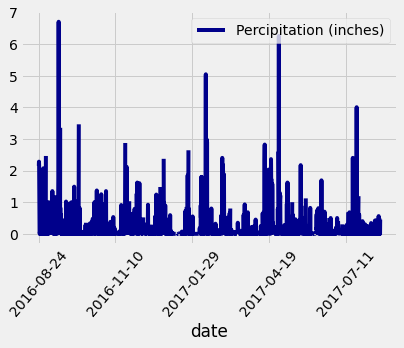

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
Last_Year = dt.datetime(2017, 8, 23)-dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Last_Year).all()
result

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(result, columns = ['date', 'Percipitation (inches)'])
prcp_df = prcp_df.set_index('date')


# Sort the dataframe by date
prcp_df = prcp_df.sort_values('date')
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot = 50, color = 'darkblue')

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Percipitation (inches)
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query( 
   func.count(Station.station)).all()
total_stations[0][0]

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
obs_per_station = session.query(Measurement.station, 
   func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
obs_per_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = obs_per_station[0][0]

<AxesSubplot:ylabel='Frequency'>

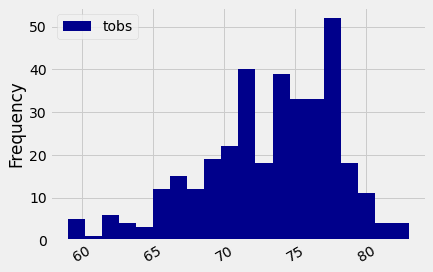

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result2 = session.query(Measurement.tobs).filter(Measurement.date >= Last_Year).filter(Measurement.station == most_active_station).all()


tobs_df = pd.DataFrame(result2, columns = ['tobs'])

tobs_df.plot.hist(rot = 30, color = 'darkblue',style = "solid", bins = 20)

# Close session

In [18]:
# Close Session
session.close()